## Produce digits of power

In [252]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

import random
import pickle

import sklearn.datasets
import sklearn.model_selection

import sklearn.neural_network

In [253]:
from keras.datasets import mnist
from keras.layers import Dense, Flatten
(X, y), (x_test, y_test) = mnist.load_data()

Preprocessing

In [254]:
Ns = [10,12,14,16,18,20]

In [255]:
X=X/255
XT=x_test/255
yT=y_test

In [256]:
X=X.reshape(60000, 28**2)
XT=XT.reshape(10000, 28**2)

In [257]:
# Call MNIST and keep 3s and 7s
#mnist = sklearn.datasets.fetch_mldata("MNIST original")

# Rescale the data and extract all images for two digits
#X, y = mnist.data / 255., mnist.target

index = np.where((y == 3) | (y == 7))[0]
X0,y = X[index], y[index]

Index = np.where((yT == 3) | (yT == 7))[0]
XT,yT = XT[Index], yT[Index]

X0_train1, X0_train2, y_train1, y_train2 = sklearn.model_selection.train_test_split(X0, y, test_size=0.5)

Training

In [258]:
small_neural = sklearn.neural_network.MLPClassifier(activation = "relu", hidden_layer_sizes=(4,), max_iter = 500, solver='sgd', random_state=5, learning_rate = 'adaptive',verbose = 1)
small_neural.fit(X0_train1,y_train1)


Iteration 1, loss = 0.68541312
Iteration 2, loss = 0.53577560
Iteration 3, loss = 0.44939525
Iteration 4, loss = 0.40569086
Iteration 5, loss = 0.37748546
Iteration 6, loss = 0.35651733
Iteration 7, loss = 0.33959157
Iteration 8, loss = 0.32514813
Iteration 9, loss = 0.31250971
Iteration 10, loss = 0.30115191
Iteration 11, loss = 0.29086323
Iteration 12, loss = 0.28141328
Iteration 13, loss = 0.27268393
Iteration 14, loss = 0.26459546
Iteration 15, loss = 0.25704780
Iteration 16, loss = 0.24999617
Iteration 17, loss = 0.24336052
Iteration 18, loss = 0.23714605
Iteration 19, loss = 0.23126334
Iteration 20, loss = 0.22575366
Iteration 21, loss = 0.22048387
Iteration 22, loss = 0.21550662
Iteration 23, loss = 0.21078659
Iteration 24, loss = 0.20632043
Iteration 25, loss = 0.20200823
Iteration 26, loss = 0.19795028
Iteration 27, loss = 0.19404559
Iteration 28, loss = 0.19034589
Iteration 29, loss = 0.18679659
Iteration 30, loss = 0.18336530
Iteration 31, loss = 0.18013583
Iteration 32, los

Iteration 256, loss = 0.04899027
Iteration 257, loss = 0.04885523
Iteration 258, loss = 0.04870860
Iteration 259, loss = 0.04857240
Iteration 260, loss = 0.04844051
Iteration 261, loss = 0.04829386
Iteration 262, loss = 0.04816432
Iteration 263, loss = 0.04801669
Iteration 264, loss = 0.04787733
Iteration 265, loss = 0.04775583
Iteration 266, loss = 0.04765826
Iteration 267, loss = 0.04748637
Iteration 268, loss = 0.04734198
Iteration 269, loss = 0.04719824
Iteration 270, loss = 0.04708690
Iteration 271, loss = 0.04694742
Iteration 272, loss = 0.04682536
Iteration 273, loss = 0.04673551
Iteration 274, loss = 0.04656541
Iteration 275, loss = 0.04644075
Iteration 276, loss = 0.04630798
Iteration 277, loss = 0.04617923
Iteration 278, loss = 0.04604478
Iteration 279, loss = 0.04592386
Iteration 280, loss = 0.04579218
Iteration 281, loss = 0.04567971
Iteration 282, loss = 0.04555257
Iteration 283, loss = 0.04543510
Iteration 284, loss = 0.04529762
Iteration 285, loss = 0.04520423
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=1,
       warm_start=False)

In [259]:
def hill(x,n,theta):
#     return x**n
    return x**n/(x**n + theta**n)

In [260]:
theta = 0.5
middle = np.zeros((len(Ns),len(X0_train2)))
for idx_N,N in enumerate(Ns):
    X = hill(X0_train2,N,theta)
    middle[idx_N]=small_neural.predict(X)

In [261]:
middle=np.transpose(middle)

master training

In [ ]:
master_neural = sklearn.neural_network.MLPClassifier(activation = "logistic", hidden_layer_sizes=(5,), max_iter = 500, solver='sgd', random_state=5, learning_rate = 'adaptive',verbose = 1)
master_neural.fit(middle,y_train2)

Iteration 1, loss = 0.73619562
Iteration 2, loss = 0.69065154
Iteration 3, loss = 0.67967535
Iteration 4, loss = 0.66663165
Iteration 5, loss = 0.64696989
Iteration 6, loss = 0.63891733
Iteration 7, loss = 0.63582994
Iteration 8, loss = 0.63330591
Iteration 9, loss = 0.63090694
Iteration 10, loss = 0.62857559
Iteration 11, loss = 0.62631527
Iteration 12, loss = 0.62407103
Iteration 13, loss = 0.62187739
Iteration 14, loss = 0.61966153
Iteration 15, loss = 0.61745975
Iteration 16, loss = 0.61527359
Iteration 17, loss = 0.61309793
Iteration 18, loss = 0.61090161
Iteration 19, loss = 0.60874349
Iteration 20, loss = 0.60652451
Iteration 21, loss = 0.60432527
Iteration 22, loss = 0.60212148
Iteration 23, loss = 0.59990186
Iteration 24, loss = 0.59769070
Iteration 25, loss = 0.59545594
Iteration 26, loss = 0.59324350
Iteration 27, loss = 0.59095376
Iteration 28, loss = 0.58870101
Iteration 29, loss = 0.58640909
Iteration 30, loss = 0.58411125
Iteration 31, loss = 0.58182271
Iteration 32, los

Iteration 257, loss = 0.12061926
Iteration 258, loss = 0.12008557
Iteration 259, loss = 0.11958641
Iteration 260, loss = 0.11909899
Iteration 261, loss = 0.11859854
Iteration 262, loss = 0.11811809
Iteration 263, loss = 0.11764076
Iteration 264, loss = 0.11713874
Iteration 265, loss = 0.11667168
Iteration 266, loss = 0.11622697
Iteration 267, loss = 0.11574934
Iteration 268, loss = 0.11535044
Iteration 269, loss = 0.11488764
Iteration 270, loss = 0.11440563
Iteration 271, loss = 0.11397476
Iteration 272, loss = 0.11353707
Iteration 273, loss = 0.11310892
Iteration 274, loss = 0.11269045
Iteration 275, loss = 0.11229706
Iteration 276, loss = 0.11186601
Iteration 277, loss = 0.11147876
Iteration 278, loss = 0.11108145
Iteration 279, loss = 0.11066768
Iteration 280, loss = 0.11028526
Iteration 281, loss = 0.10988685
Iteration 282, loss = 0.10952792
Iteration 283, loss = 0.10913519
Iteration 284, loss = 0.10877260
Iteration 285, loss = 0.10840269
Iteration 286, loss = 0.10804028
Iteration 

Testing

In [ ]:
def adv_per3(X,eps,delta):
    return X - eps*np.sign(delta)
def adv_per7(X,eps,delta):
    return X + eps*np.sign(delta)
delta = X0[y == 3].mean(axis=0) - X0[y == 7].mean(axis=0)

In [ ]:
XT_perturbed = np.zeros(XT.shape)
theta = 0.5
middle = np.zeros((len(Ns),len(XT)))
epsilon = np.arange(0,0.5,0.01)
Thomas = np.zeros((len(Ns),len(epsilon)))
score = []
for idx_eps,eps in enumerate(epsilon):
    XT_perturbed[yT == 3] = adv_per3(XT[yT == 3],eps,delta)
    XT_perturbed[yT == 7] = adv_per7(XT[yT == 7],eps,delta)
    for idx_N,N in enumerate(Ns):
        X = hill(XT_perturbed,N,theta)
        middle[idx_N]=small_neural.predict(X)
        Thomas[idx_N][idx_eps]=small_neural.score(X,yT)
    
    middleT=np.transpose(middle)
    score.append(master_neural.score(middleT,yT))


In [ ]:
fig,ax = plt.subplots()
ax.plot(epsilon,score)
ax.plot(epsilon,Thomas[len(Thomas)-1])
ax.set_title(r"Even powers; $\theta$ = %.1f"%theta)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Accuracy")
plt.legend(['ours','Thomas'], title = "       N")
#plt.savefig("../Figures/Even-powers.png")

In [ ]:
final = True
for i in range(len(score)):
    if (score[i]<0.8 and final):
        print(epsilon[i])
        final = False
final = True
for i in range(len(Thomas[len(Thomas)-1])):
    if (Thomas[len(Thomas)-1][i]<0.8 and final):
        print(epsilon[i])
        final = False

In [ ]:
X0_adv_test = np.zeros(X0_test.shape)
theta = 0.5
epsilon = np.arange(0,0.5,0.01)
Ns = np.arange(11)
score = np.zeros((len(Ns),len(epsilon)))
for idx_eps,eps in enumerate(epsilon):
    X0_adv_test[y_test == 3] = adv_per3(X0_test[y_test == 3],eps,delta)
    X0_adv_test[y_test == 7] = adv_per7(X0_test[y_test == 7],eps,delta)
    for idx_N,N in enumerate(Ns):
        X1_adv_test = hill(X0_adv_test,N,theta)
        score[idx_N,idx_eps]=mlp_orig.score(X1_adv_test,y_test)

In [ ]:
fig,ax = plt.subplots()
for line in score[range(2,12,2),:]:
    ax.plot(epsilon,line)
    ax.set_title(r"Even powers; $\theta$ = %.1f"%theta)
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Accuracy")
    plt.legend([2,4,6,8,10], title = "       N")
    #plt.savefig("../Figures/Even-powers.png")
    
fig,ax = plt.subplots()
for line in score[range(1,11,2),:]:
    ax.plot(epsilon,line)
    ax.set_title(r"Odd powers; $\theta$ = %.1f"%theta)
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Accuracy")
    plt.legend(range(1,11,2), title = "        N")
    #plt.savefig("../Figures/Odd-powers.png")

plt.show()

In [ ]:
score_naive = np.zeros((len(epsilon),1))
for idx_eps,eps in enumerate(epsilon):
    X0_adv_test[y_test == 3] = adv_per3(X0_test[y_test == 3],eps,delta)
    X0_adv_test[y_test == 7] = adv_per7(X0_test[y_test == 7],eps,delta)
    score_naive[idx_eps]=mlp_orig.score(X0_adv_test,y_test)

In [ ]:
for line in score_naive.T:
    plt.plot(epsilon,line)
    plt.title("Naive adversarial perturbation")
    plt.legend(["No transformation"])
plt.show()

## Compute gradient manually

In [238]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [239]:
def relu(x):
    for i in range(len(x)):
        x[i] = np.max((0,x[i]))
    return x

In [240]:
def hill(x,n,theta):
#     return x**n
    return x**n/(x**n + theta**n)

In [241]:
def score(x,use_hill,N,theta,mlp):
    W = mlp.coefs_
    b = mlp.intercepts_
    if use_hill:
        y = hill(x,N,theta)
    else:
        y = x[:]
    return sigmoid(np.dot(relu(np.dot(y,W[0])+b[0]),W[1])+b[1])

In [242]:
def grad_score(x,use_hill,N,theta,mlp):
    grad = np.zeros(x.shape)
    for i in range(len(x)):
        yp = x.copy(); yp[i] += 10/255; 
        ym = x.copy(); ym[i] -= 10/255;
        grad[i] = 255/2*(score(yp,use_hill,N,theta,mlp)-score(ym,use_hill,N,theta,mlp))
    return grad

In [243]:
def iter_grad(x0,use_hill,N,theta,mlp,eps):
    num_iter = 0; 
    x = x0.copy()
    pred = mlp.predict(x0.reshape(1,-1))
    new_pred = mlp.predict(x.reshape(1,-1))
    pm = (pred-5)/2 #3 -> -1; 7 -> +1
    while new_pred == pred:
        grad = grad_score(x,use_hill,N,theta,mlp)
        x -= pm*eps*grad[:]
        new_pred = mlp.predict(x.reshape(1,-1))
        print(score(x,use_hill,N,theta,mlp))
        num_iter += 1
    return x,num_iter

In [244]:
use_hill=True;N=10;theta=0.5
x0 = X0_test[y_test==3][1000]
grad = grad_score(x0,True,N,theta,mlp_orig)
plt.imshow(grad.reshape(28,28),cmap=plt.cm.gray)
plt.axis('off');plt.show()

NameError: name 'X0_test' is not defined

[0.99974438]
[0.99967377]
[0.99958719]
[0.99950201]
[0.99943272]
[0.9993761]
[0.99932715]
[0.99928423]
[0.99924613]
[0.99921094]
[0.99917637]
[0.99913971]
[0.9990965]
[0.99903809]
[0.99895625]
[0.99886442]
[0.99875223]
[0.99852028]
[0.99830909]
[0.99825342]
[0.9982097]
[0.99815806]
[0.9980618]
[0.99777888]
[0.99733757]
[0.99723265]
[0.997112]
[0.99689509]
[0.99675982]
[0.99656834]
[0.9958072]
[0.99295332]
[0.99285109]
[0.99279339]
[0.99274333]
[0.99268482]
[0.99257579]
[0.99196339]
[0.98923573]
[0.98825682]
[0.98464329]
[0.98453565]
[0.98435471]
[0.98365773]
[0.96918899]
[0.97395546]
[0.94493904]
[0.84103246]
[0.87014672]


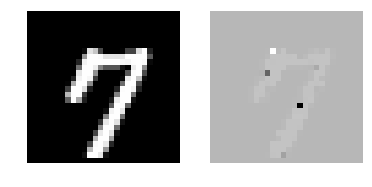

In [21]:
x0 = X0_test[y_test==7][1000]
x1,num_iter = iter_grad(x0,True,10,theta,mlp_orig,5)
fig,ax = plt.subplots(1,2)
ax[0].imshow(x0.reshape(28,28),cmap=plt.cm.gray)
ax[1].imshow(x1.reshape(28,28),cmap=plt.cm.gray)
# ax[2].imshow(hill(x.reshape(28,28),N,theta),cmap=plt.cm.gray)

[a.axis('off') for a in ax]
plt.show()

In [237]:
sample = [int(len(X0_test)*random.random()) for _ in range(10)]

for i in sample:
    x = X0_test[i]
    grad_xF = grad_score(x,False,0,0,mlp_orig)
    print(sum(grad_xF**2))
    grad_xT = grad_score(x,True,10,0.5,mlp_orig)
    fig,ax = plt.subplots(1,3)
    ax[0].imshow(x.reshape(28,28),cmap=plt.cm.gray)
    ax[1].imshow((grad_xF).reshape(28,28),cmap=plt.cm.gray)
    ax[2].imshow((grad_xT).reshape(28,28),cmap=plt.cm.gray)
    [a.axis('off') for a in ax]
    plt.show()
# print(grad)

NameError: name 'X0_test' is not defined

In [34]:
print(score(x,False,0,0,mlp_orig))
print(y_test[num])

[0.01646657]
3.0


3.0
0


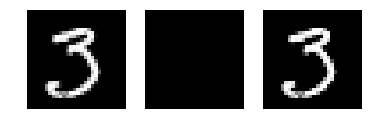

In [40]:
num = 1360
eps = 0.5
use_hill = True
N = 2
theta = 0.8
x = X0_test[y_test == 3][num].copy()
pred = y_test[y_test == 3][num]
# pred = score(x,use_hill,N,theta,mlp_orig)
print(pred)
num_iter = 0
# while pred == y_test[num]:
while pred < 0.98:
    print(score(x,use_hill,N,theta,mlp_orig))
    grad = grad_score(x,use_hill,N,theta,mlp_orig)
    if y_test[num] == 3:
        x += eps*grad[:]
    elif y_test[num] == 7:
        x -= eps*grad[:]
#     pred = mlp_orig.predict(x.reshape(1,-1))
    pred = score(x,use_hill,N,theta,mlp_orig)
    num_iter += 1
print(num_iter)
fig,ax = plt.subplots(1,3)
ax[0].imshow(X0_test[y_test == 3][num].reshape(28,28),cmap=plt.cm.gray)
ax[1].imshow(grad.reshape(28,28),cmap=plt.cm.gray)
ax[2].imshow(hill(x.reshape(28,28),N,theta),cmap=plt.cm.gray)
[a.axis('off') for a in ax]
plt.show()

2 [4.]


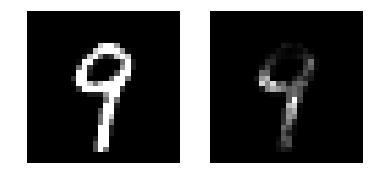

6 [4.]


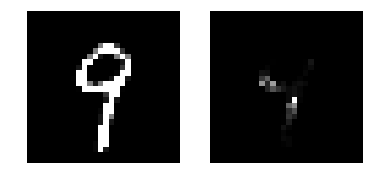

10 [4.]


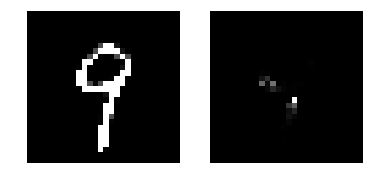

14 [4.]


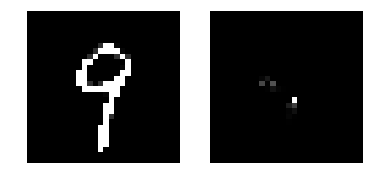

18 [4.]


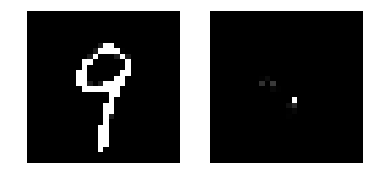

22 [4.]


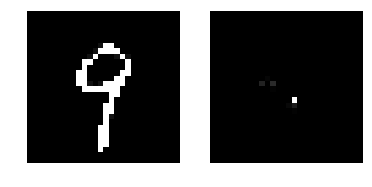

26 [4.]


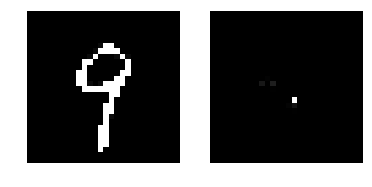

In [588]:
for i in np.arange(2,30,4):
    y = hill(x.reshape(1,-1),i,theta)
    print(i, mlp_orig.predict(y))
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(hill(X0_test[num].reshape(28,28),i,theta),cmap=plt.cm.gray)
    ax[1].imshow(y.reshape(28,28),cmap=plt.cm.gray)
    [a.axis('off') for a in ax]
    plt.show()

[760, 406, 638, 1045, 322]
[0.99771786]
[0.99979101]
[0.97157543]
[0.9999972]
[0.99999471]


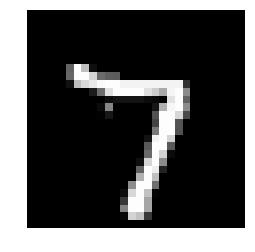

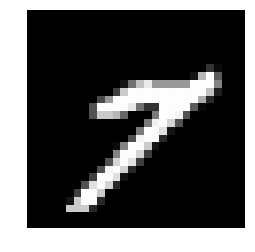

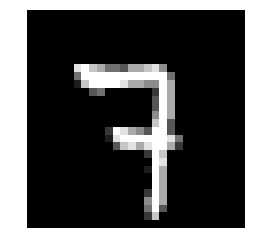

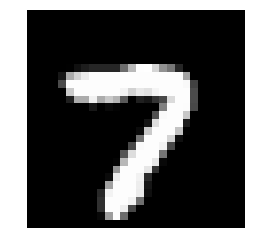

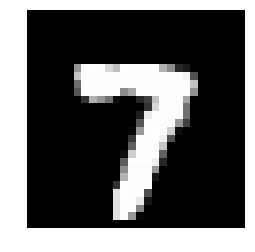

In [109]:
sample = [int(len(X0_test[y_test == 7])*random.random()) for _ in range(5)]
print(sample)
score7 = [print(score(X0_test[y_test == 7][i],False,0,0,mlp_orig)) for i in sample]
for i in sample:
    x = X0_test[y_test == 7][i]
    plt.imshow(x.reshape(28,28),cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [141]:
N = 2; theta = 0.8
sample = [1359, 189, 1314, 366, 1129, 1045]
epsilon = np.arange(0.2,1.2,0.2)
num_iter_table = [np.zeros((len(sample),len(epsilon)))]*2

for i,x in enumerate(X0_test[y_test==7][sample]):
    for j,eps in enumerate(epsilon):
        num_iter_table[0][i,j] = iter_grad(x,7,False,N,theta,mlp_orig,eps)
        num_iter_table[1][i,j] = iter_grad(x,7,True,N,theta,mlp_orig,eps)
pprint(num_iter_table[0])
pprint(num_iter_table[1])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])
